In [1]:
import pandas as pd
import os
import arxiv

import urllib
from sklearn.metrics.pairwise import cosine_similarity
import fitz
import tensorflow_hub as hub
import numpy as np 


In [2]:
from function import *

In [3]:
import time
import matplotlib as plt

In [4]:
# sample.loc[:,['title','Succes', 'w_Anth', 'w_Arxiv', 'w_both', 'pages_Anth', 'pages_Arxiv', 'cosine', 'len_blocks', 'len_Anth', 'len_Arxiv', 'len_both', 'ref_Anth', 'ref_Arxiv', 'Jaccard' ]]


# Store and load tables/csv of sample and not sample

In [5]:
#ran comparison
ran_sample = pd.read_csv('ran_sample.csv',index_col='Unnamed: 0')

In [6]:
#reading csv
sample = pd.read_csv('sample.csv',index_col='Unnamed: 0')
not_sample = pd.read_csv('not_sample.csv',index_col='Unnamed: 0')

In [8]:
table = pd.read_csv('combined_table.csv',index_col='Unnamed: 0')

C:\Users\20193635\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (6,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)



In [9]:
table.language.unique()

array([nan, 'English'], dtype=object)

In [12]:
anth = pd.read_csv('anthology_table.csv',index_col='Unnamed: 0')

C:\Users\20193635\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)



In [19]:
anth.language.value_counts()

French     1440
English    1384
Chinese     204
German        1
Name: language, dtype: int64

In [28]:
anth.head(2)

,ISBN,address,booktitle,doi,journal,language,month,note,number,pages,publisher,title,url,volume,year
0,NaN,Online,NaN,NaN,NaN,NaN,August,NaN,NaN,NaN,Association for Computational Linguistics,Proceedings of the 5th Workshop on Online Abus...,https://aclanthology.org/2021.woah-1.0,NaN,2021
1,NaN,Online,Proceedings of the 5th Workshop on Online Abus...,10.18653/v1/2021.woah-1.1,NaN,NaN,August,NaN,NaN,1--5,Association for Computational Linguistics,Exploiting Auxiliary Data for Offensive Langua...,https://aclanthology.org/2021.woah-1.1,NaN,2021


In [99]:
(74520-63916)/74520, (63916)/74520

(0.14229736983360172, 0.8577026301663982)

In [67]:
66501-63916

2585

In [69]:
2585-1440-204-292 #

649

In [74]:
66501-292-204-

63786

In [75]:
63948-63916

32

In [77]:
66501-64153

2348

In [37]:
66501-1384-204-965

63948

In [46]:
len(anth2[anth2['language']=='Chinese']), len(anth2[anth2['language']=='French'])


(204, 1440)

In [54]:
table.language.value_counts(), len(table)

(English    1383
 Name: language, dtype: int64,
 63916)

In [76]:
anth.language.value_counts()

French     1440
English    1384
Chinese     204
German        1
Name: language, dtype: int64

In [59]:
print(len(anth2.duplicated(subset = ['title'])))

64153


In [71]:
# table[table['title'].str.contains("In Chinese")]

In [85]:
anth1 = anth.dropna(axis =0 , subset=['month'])
print(len(anth2))
print(len(anth2['title'].duplicated()), 'wait what')
anth2 = anth1.drop_duplicates(subset= ['title'])
print(len(anth2))
# .language.value_counts()
anth2 = anth2.drop(anth2[anth2['title'].str.contains("In Chinese")].index)
print(len(anth2))
anth2 = anth2[anth2['language']!= 'Chinese']
print(len(anth2))
anth2 = anth2[anth2['language']!= 'French']
print(len(anth2))


print(len(anth2)) #.language.value_counts()


# table = table[table['language']!= 'Chinese']
# table = table[table['language']!= 'French']

64153
64153 wait what
66199
65797
65593
64153
64153


In [43]:
len(anth2)-1440-204-965

63480

In [29]:
len(anth)-anth.month.isna().sum()

66501

In [25]:
anth.month.isna().sum()

8019

In [36]:
anth['title'].duplicated().sum()

965

In [109]:
len(table[table['title_Arxiv']=='NF'])

24448

In [106]:
len(table)

63916

In [105]:
table.isna().sum()

ISBN               62513
address              741
booktitle           2491
doi                36791
journal            63243
language           62533
month                  0
note               63723
number             63451
pages               9870
publisher           3903
title                  0
url                    0
volume             63451
year                   0
clean                  0
title_Arxiv        30603
pdf_url_Arxiv      55031
published_Arxiv    55031
result_Arxiv       55031
dtype: int64

# see tables

In [7]:
not_sample

,title,year,month,url,title_Arxiv,pdf_url_Arxiv,published_Arxiv,result_Arxiv
2,Modeling Profanity and Hate Speech in Social M...,2021,August,https://aclanthology.org/2021.woah-1.2,Modeling Profanity and Hate Speech in Social M...,http://arxiv.org/pdf/2106.07505v1,2021-06-14 15:34:37+00:00,http://arxiv.org/abs/2106.07505v2
3,HateBERT: Retraining BERT for Abusive Language...,2021,August,https://aclanthology.org/2021.woah-1.3,HateBERT: Retraining BERT for Abusive Language...,http://arxiv.org/pdf/2010.12472v1,2020-10-23 15:14:14+00:00,http://arxiv.org/abs/2010.12472v2
4,Memes in the Wild: Assessing the Generalizabil...,2021,August,https://aclanthology.org/2021.woah-1.4,Memes in the Wild: Assessing the Generalizabil...,http://arxiv.org/pdf/2107.04313v1,2021-07-09 09:04:05+00:00,http://arxiv.org/abs/2107.04313v1
26,Text Simplification for Comprehension-based Qu...,2021,November,https://aclanthology.org/2021.wnut-1.1,Text Simplification for Comprehension-based Qu...,http://arxiv.org/pdf/2109.13984v1,2021-09-28 18:48:00+00:00,http://arxiv.org/abs/2109.13984v1
28,Detecting Depression in Thai Blog Posts: a Dat...,2021,November,https://aclanthology.org/2021.wnut-1.3,Detecting Depression in Thai Blog Posts: a Dat...,http://arxiv.org/pdf/2111.04574v1,2021-11-08 15:36:21+00:00,http://arxiv.org/abs/2111.04574v1
...,...,...,...,...,...,...,...,...
32995,Arabizi Detection and Conversion to Arabic,2014,October,https://aclanthology.org/W14-3629,Arabizi Detection and Conversion to Arabic,http://arxiv.org/pdf/1306.6755v1,2013-06-28 08:46:11+00:00,http://arxiv.org/abs/1306.6755v1
33080,DiscoTK: Using Discourse Structure for Machine...,2014,June,https://aclanthology.org/W14-3352,DiscoTK: Using Discourse Structure for Machine...,http://arxiv.org/pdf/1911.12547v1,2019-11-28 06:05:12+00:00,http://arxiv.org/abs/1911.12547v1
33180,Credibility Adjusted Term Frequency: A Supervi...,2014,June,https://aclanthology.org/W14-2614,Credibility Adjusted Term Frequency: A Supervi...,http://arxiv.org/pdf/1405.3518v1,2014-05-14 14:50:59+00:00,http://arxiv.org/abs/1405.3518v2
33183,Improving Agreement and Disagreement Identific...,2014,June,https://aclanthology.org/W14-2617,Improving Agreement and Disagreement Identific...,http://arxiv.org/pdf/1606.05706v1,2016-06-17 23:29:11+00:00,http://arxiv.org/abs/1606.05706v1


In [8]:
sample

,title,year,month,url,title_Arxiv,pdf_url_Arxiv,published_Arxiv,result_Arxiv,Succes,w_Anth,...,pages_Anth,pages_Arxiv,cosine,len_blocks,len_Anth,len_Arxiv,len_both,ref_Anth,ref_Arxiv,Jaccard
0,Artificial Text Detection via Examining the To...,2021,November,https://aclanthology.org/2021.emnlp-main.50,Artificial Text Detection via Examining the To...,http://arxiv.org/pdf/2109.04825v1,2021-09-10 12:13:45+00:00,http://arxiv.org/abs/2109.04825v2,1.0,8305.0,...,15.0,15.0,0.999025,222.0,222.0,222.0,222.0,103.0,98.0,0.993084
1,The CLaC Discourse Parser at CoNLL-2015,2015,July,https://aclanthology.org/K15-2008,The CLaC Discourse Parser at CoNLL-2015,http://arxiv.org/pdf/1708.05857v1,2017-08-19 14:43:50+00:00,http://arxiv.org/abs/1708.05857v1,1.0,2307.0,...,5.0,6.0,0.999497,113.0,113.0,113.0,113.0,10.0,9.0,0.975108
2,A Probabilistic Generative Model for Typograph...,2020,July,https://aclanthology.org/2020.acl-main.266,A Probabilistic Generative Model for Typograph...,http://arxiv.org/pdf/2005.01646v1,2020-05-04 17:01:11+00:00,http://arxiv.org/abs/2005.01646v1,1.0,3966.0,...,7.0,8.0,0.910497,110.0,110.0,110.0,110.0,52.0,52.0,0.981017
3,"Personalizing Dialogue Agents: I have a dog, d...",2018,July,https://aclanthology.org/P18-1205,"Personalizing Dialogue Agents: I have a dog, d...",http://arxiv.org/pdf/1801.07243v1,2018-01-22 18:58:18+00:00,http://arxiv.org/abs/1801.07243v5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Zero-Shot Semantic Parsing for Instructions,2019,July,https://aclanthology.org/P19-1438,Zero-Shot Semantic Parsing for Instructions,http://arxiv.org/pdf/1911.08827v1,2019-11-20 11:14:07+00:00,http://arxiv.org/abs/1911.08827v1,1.0,7204.0,...,11.0,11.0,0.999967,171.0,171.0,171.0,171.0,43.0,41.0,0.991091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Relative Importance in Sentence Processing,2021,August,https://aclanthology.org/2021.acl-short.19,Relative Importance in Sentence Processing,http://arxiv.org/pdf/2106.03471v1,2021-06-07 09:56:18+00:00,http://arxiv.org/abs/2106.03471v1,1.0,4980.0,...,10.0,10.0,0.999369,122.0,122.0,122.0,122.0,70,65,0.989617
1996,Tired of Topic Models? Clusters of Pretrained ...,2020,November,https://aclanthology.org/2020.emnlp-main.135,Tired of Topic Models? Clusters of Pretrained ...,http://arxiv.org/pdf/2004.14914v1,2020-04-30 16:18:18+00:00,http://arxiv.org/abs/2004.14914v2,1.0,4968.0,...,9.0,6.0,0.934366,1.0,30.0,31.0,30.0,76,44,0.396257
1997,Partially-Aligned Data-to-Text Generation with...,2020,November,https://aclanthology.org/2020.emnlp-main.738,Partially-Aligned Data-to-Text Generation with...,http://arxiv.org/pdf/2010.01268v1,2020-10-03 03:18:52+00:00,http://arxiv.org/abs/2010.01268v1,1.0,7288.0,...,11.0,11.0,0.999646,234.0,234.0,234.0,234.0,35,33,0.992841
1998,Regressing Location on Text for Probabilistic ...,2021,August,https://aclanthology.org/2021.case-1.8,Regressing Location on Text for Probabilistic ...,http://arxiv.org/pdf/2107.00080v1,2021-06-30 20:04:55+00:00,http://arxiv.org/abs/2107.00080v1,1.0,2566.0,...,5.0,5.0,0.996497,73.0,73.0,73.0,73.0,13,17,0.978793


In [9]:
ran_sample

,title,url,index,title_Arxiv,pdf_url_Arxiv,result_Arxiv,Succes,w_Anth,w_Arxiv,w_both,...,pages_Arxiv,cosin,len_blocks,len_Anth,len_Arxiv,len_both,ref_Anth,ref_Arxiv,Jaccard,cosine
0,Mitigating Biases in Toxic Language Detection ...,https://aclanthology.org/2021.woah-1.12,8880,Credibility Adjusted Term Frequency: A Supervi...,http://arxiv.org/pdf/1405.3518v1,http://arxiv.org/abs/1405.3518v2,1.0,4248.0,2542.0,4.0,...,5.0,NaN,3.0,3.0,3.0,3.0,36.0,22.0,0.096110,0.839718
1,HateBERT: Retraining BERT for Abusive Language...,https://aclanthology.org/2021.woah-1.3,8876,A Novel Two-stage Framework for Extracting Opi...,http://arxiv.org/pdf/2101.09743v1,http://arxiv.org/abs/2101.09743v1,1.0,4919.0,5728.0,4.0,...,9.0,NaN,3.0,3.0,3.0,3.0,65.0,26.0,0.106205,0.812526
2,Text Simplification for Comprehension-based Qu...,https://aclanthology.org/2021.wnut-1.1,8882,Finding Eyewitness Tweets During Crises,http://arxiv.org/pdf/1403.1773v1,http://arxiv.org/abs/1403.1773v1,1.0,5292.0,6346.0,4.0,...,11.0,NaN,3.0,3.0,3.0,3.0,40.0,23.0,0.115042,0.819863
3,Memes in the Wild: Assessing the Generalizabil...,https://aclanthology.org/2021.woah-1.4,8877,Arabic Spelling Correction using Supervised Le...,http://arxiv.org/pdf/1409.8309v1,http://arxiv.org/abs/1409.8309v1,1.0,4865.0,3723.0,4.0,...,6.0,NaN,3.0,3.0,3.0,3.0,87.0,16.0,0.104698,0.736999
4,Measuring and Improving Model-Moderator Collab...,https://aclanthology.org/2021.woah-1.5,8878,Arabizi Detection and Conversion to Arabic,http://arxiv.org/pdf/1306.6755v1,http://arxiv.org/abs/1306.6755v1,1.0,10061.0,4631.0,8.0,...,8.0,NaN,5.0,5.0,5.0,5.0,405.0,3.0,0.097291,0.698223
5,Modeling Profanity and Hate Speech in Social M...,https://aclanthology.org/2021.woah-1.2,8875,Overcoming the Curse of Sentence Length for Ne...,http://arxiv.org/pdf/1409.1257v1,http://arxiv.org/abs/1409.1257v2,1.0,7037.0,4359.0,5.0,...,7.0,NaN,1.0,4.0,6.0,4.0,28.0,57.0,0.105679,0.895097
6,When the Echo Chamber Shatters: Examining the ...,https://aclanthology.org/2021.woah-1.18,8881,Improving Agreement and Disagreement Identific...,http://arxiv.org/pdf/1606.05706v1,http://arxiv.org/abs/1606.05706v1,1.0,8666.0,6637.0,4.0,...,10.0,NaN,3.0,3.0,3.0,3.0,78.0,35.0,0.114820,0.822923
7,Detecting Depression in Thai Blog Posts: a Dat...,https://aclanthology.org/2021.wnut-1.3,8883,Temporal Analysis of Language through Neural L...,http://arxiv.org/pdf/1405.3515v1,http://arxiv.org/abs/1405.3515v1,1.0,3460.0,2732.0,4.0,...,5.0,NaN,3.0,3.0,3.0,3.0,37.0,17.0,0.110707,0.756279
8,Can images help recognize entities? A study of...,https://aclanthology.org/2021.wnut-1.11,8884,A Deep Architecture for Semantic Parsing,http://arxiv.org/pdf/1404.7296v1,http://arxiv.org/abs/1404.7296v1,1.0,6047.0,3070.0,5.0,...,6.0,NaN,4.0,4.0,4.0,4.0,27.0,24.0,0.120555,0.776954
9,Improving Counterfactual Generation for Fair H...,https://aclanthology.org/2021.woah-1.10,8879,DiscoTK: Using Discourse Structure for Machine...,http://arxiv.org/pdf/1911.12547v1,http://arxiv.org/abs/1911.12547v1,1.0,5436.0,4296.0,4.0,...,8.0,NaN,3.0,3.0,3.0,3.0,75.0,22.0,0.095070,0.846595


# statistics and explore results

In [86]:
sample.columns

Index(['title', 'year', 'month', 'url', 'title_Arxiv', 'pdf_url_Arxiv',
       'published_Arxiv', 'result_Arxiv', 'Succes', 'w_Anth', 'w_Arxiv',
       'w_both', 'pages_Anth', 'pages_Arxiv', 'cosine', 'len_blocks',
       'len_Anth', 'len_Arxiv', 'len_both', 'ref_Anth', 'ref_Arxiv',
       'Jaccard'],
      dtype='object')

# Figures

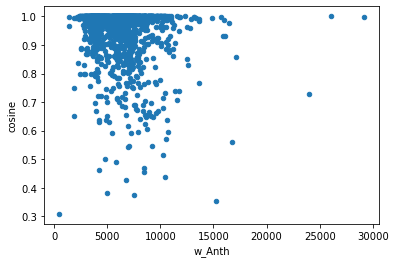

In [87]:
ax = sample.plot(x= 'w_Anth',y = 'cosine', kind = 'scatter') # xlabel = 'Section', ylabel = 'Number of words')
fig = ax.get_figure()
# fig
# fig.savefig('No title bar df2')

In [ ]:
ax = sample.plot(x= 'w_Anth',y = 'Jaccard', kind = 'scatter') # xlabel = 'Section', ylabel = 'Number of words')
fig = ax.get_figure()

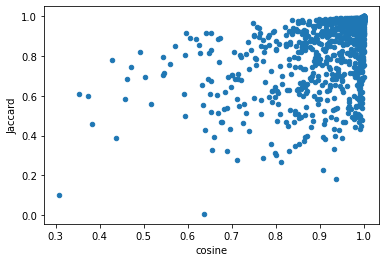

In [89]:
ax = sample.plot(x= 'cosine',y = 'Jaccard', kind = 'scatter') # xlabel = 'Section', ylabel = 'Number of words')
fig = ax.get_figure()

In [112]:
sample.describe()

,year,Succes,w_Anth,w_Arxiv,w_both,pages_Anth,pages_Arxiv,cosine,len_blocks,len_Anth,len_Arxiv,len_both,Jaccard
count,2000.000000,2000.000000,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000
mean,2019.339000,0.899500,6256.074486,6143.641467,4109.546415,10.495275,10.503057,0.958994,130.876042,141.816565,142.230128,141.814897,0.907562
std,1.580927,0.300741,2307.860855,2242.695046,2648.813332,3.940302,3.906565,0.087035,85.302463,77.730852,77.628586,77.733885,0.147273
min,2014.000000,0.000000,502.000000,1375.000000,0.000000,3.000000,3.000000,0.308500,1.000000,1.000000,1.000000,0.000000,0.005949
25%,2018.000000,1.000000,4444.000000,4432.000000,1794.000000,8.000000,8.000000,0.966810,68.500000,84.000000,84.000000,84.000000,0.896704
50%,2020.000000,1.000000,6273.000000,6148.000000,3990.000000,10.000000,10.000000,0.997527,127.000000,133.000000,134.000000,133.000000,0.982561
75%,2021.000000,1.000000,7406.000000,7282.000000,6180.000000,12.000000,12.000000,0.999667,190.000000,193.000000,193.000000,193.000000,0.990166
max,2021.000000,1.000000,29143.000000,28067.000000,25440.000000,55.000000,54.000000,1.000000,696.000000,696.000000,696.000000,696.000000,1.000000


In [116]:
ran_sample

,title,url,index,title_Arxiv,pdf_url_Arxiv,result_Arxiv,Succes,w_Anth,w_Arxiv,w_both,...,pages_Arxiv,cosin,len_blocks,len_Anth,len_Arxiv,len_both,ref_Anth,ref_Arxiv,Jaccard,cosine
0,Mitigating Biases in Toxic Language Detection ...,https://aclanthology.org/2021.woah-1.12,8880,Credibility Adjusted Term Frequency: A Supervi...,http://arxiv.org/pdf/1405.3518v1,http://arxiv.org/abs/1405.3518v2,1.0,4248.0,2542.0,4.0,...,5.0,NaN,3.0,3.0,3.0,3.0,36.0,22.0,0.096110,0.839718
1,HateBERT: Retraining BERT for Abusive Language...,https://aclanthology.org/2021.woah-1.3,8876,A Novel Two-stage Framework for Extracting Opi...,http://arxiv.org/pdf/2101.09743v1,http://arxiv.org/abs/2101.09743v1,1.0,4919.0,5728.0,4.0,...,9.0,NaN,3.0,3.0,3.0,3.0,65.0,26.0,0.106205,0.812526
2,Text Simplification for Comprehension-based Qu...,https://aclanthology.org/2021.wnut-1.1,8882,Finding Eyewitness Tweets During Crises,http://arxiv.org/pdf/1403.1773v1,http://arxiv.org/abs/1403.1773v1,1.0,5292.0,6346.0,4.0,...,11.0,NaN,3.0,3.0,3.0,3.0,40.0,23.0,0.115042,0.819863
3,Memes in the Wild: Assessing the Generalizabil...,https://aclanthology.org/2021.woah-1.4,8877,Arabic Spelling Correction using Supervised Le...,http://arxiv.org/pdf/1409.8309v1,http://arxiv.org/abs/1409.8309v1,1.0,4865.0,3723.0,4.0,...,6.0,NaN,3.0,3.0,3.0,3.0,87.0,16.0,0.104698,0.736999
4,Measuring and Improving Model-Moderator Collab...,https://aclanthology.org/2021.woah-1.5,8878,Arabizi Detection and Conversion to Arabic,http://arxiv.org/pdf/1306.6755v1,http://arxiv.org/abs/1306.6755v1,1.0,10061.0,4631.0,8.0,...,8.0,NaN,5.0,5.0,5.0,5.0,405.0,3.0,0.097291,0.698223
5,Modeling Profanity and Hate Speech in Social M...,https://aclanthology.org/2021.woah-1.2,8875,Overcoming the Curse of Sentence Length for Ne...,http://arxiv.org/pdf/1409.1257v1,http://arxiv.org/abs/1409.1257v2,1.0,7037.0,4359.0,5.0,...,7.0,NaN,1.0,4.0,6.0,4.0,28.0,57.0,0.105679,0.895097
6,When the Echo Chamber Shatters: Examining the ...,https://aclanthology.org/2021.woah-1.18,8881,Improving Agreement and Disagreement Identific...,http://arxiv.org/pdf/1606.05706v1,http://arxiv.org/abs/1606.05706v1,1.0,8666.0,6637.0,4.0,...,10.0,NaN,3.0,3.0,3.0,3.0,78.0,35.0,0.114820,0.822923
7,Detecting Depression in Thai Blog Posts: a Dat...,https://aclanthology.org/2021.wnut-1.3,8883,Temporal Analysis of Language through Neural L...,http://arxiv.org/pdf/1405.3515v1,http://arxiv.org/abs/1405.3515v1,1.0,3460.0,2732.0,4.0,...,5.0,NaN,3.0,3.0,3.0,3.0,37.0,17.0,0.110707,0.756279
8,Can images help recognize entities? A study of...,https://aclanthology.org/2021.wnut-1.11,8884,A Deep Architecture for Semantic Parsing,http://arxiv.org/pdf/1404.7296v1,http://arxiv.org/abs/1404.7296v1,1.0,6047.0,3070.0,5.0,...,6.0,NaN,4.0,4.0,4.0,4.0,27.0,24.0,0.120555,0.776954
9,Improving Counterfactual Generation for Fair H...,https://aclanthology.org/2021.woah-1.10,8879,DiscoTK: Using Discourse Structure for Machine...,http://arxiv.org/pdf/1911.12547v1,http://arxiv.org/abs/1911.12547v1,1.0,5436.0,4296.0,4.0,...,8.0,NaN,3.0,3.0,3.0,3.0,75.0,22.0,0.095070,0.846595


<AxesSubplot:ylabel='Density'>

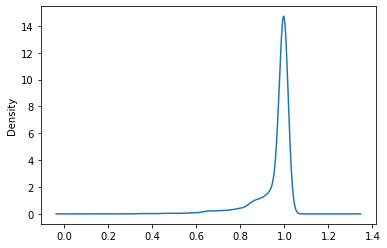

In [111]:
sample['cosine'].plot(kind = 'density')

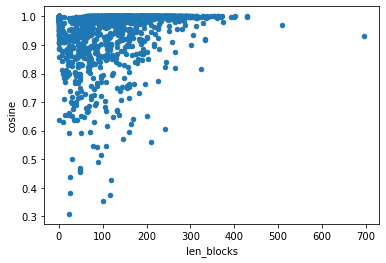

In [90]:
ax = sample.plot(x= 'len_blocks',y = 'cosine', kind = 'scatter') # xlabel = 'Section', ylabel = 'Number of words')
fig = ax.get_figure()

In [91]:
sample.describe()

,year,Succes,w_Anth,w_Arxiv,w_both,pages_Anth,pages_Arxiv,cosine,len_blocks,len_Anth,len_Arxiv,len_both,Jaccard
count,2000.000000,2000.000000,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000
mean,2019.339000,0.899500,6256.074486,6143.641467,4109.546415,10.495275,10.503057,0.958994,130.876042,141.816565,142.230128,141.814897,0.907562
std,1.580927,0.300741,2307.860855,2242.695046,2648.813332,3.940302,3.906565,0.087035,85.302463,77.730852,77.628586,77.733885,0.147273
min,2014.000000,0.000000,502.000000,1375.000000,0.000000,3.000000,3.000000,0.308500,1.000000,1.000000,1.000000,0.000000,0.005949
25%,2018.000000,1.000000,4444.000000,4432.000000,1794.000000,8.000000,8.000000,0.966810,68.500000,84.000000,84.000000,84.000000,0.896704
50%,2020.000000,1.000000,6273.000000,6148.000000,3990.000000,10.000000,10.000000,0.997527,127.000000,133.000000,134.000000,133.000000,0.982561
75%,2021.000000,1.000000,7406.000000,7282.000000,6180.000000,12.000000,12.000000,0.999667,190.000000,193.000000,193.000000,193.000000,0.990166
max,2021.000000,1.000000,29143.000000,28067.000000,25440.000000,55.000000,54.000000,1.000000,696.000000,696.000000,696.000000,696.000000,1.000000


In [95]:
ran_sample.cosine.describe()

count    10.000000
mean      0.800518
std       0.058344
min       0.698223
25%       0.761448
50%       0.816194
75%       0.835519
max       0.895097
Name: cosine, dtype: float64

# Reference figures

In [11]:
len(sample), len(sample[sample['ref_Anth'].isna()]), len(sample[sample['ref_Anth']=='NF']), len(sample[sample['ref_Arxiv']=='NF'])


(2000, 201, 5, 5)

In [138]:
ref = sample[['ref_Anth', 'ref_Arxiv', 'cosine', 'Jaccard']]
ref = ref[ref['ref_Anth']!='NF']
ref = ref.dropna()
ref[['ref_Anth', 'ref_Arxiv']] = ref[['ref_Anth', 'ref_Arxiv']].astype(float).astype(int)
ref['dif'] = ref['ref_Anth']-ref['ref_Arxiv']

In [156]:
ref.describe()

,ref_Anth,ref_Arxiv,cosine,Jaccard,dif
count,1794.000000,1794.00000,1794.000000,1794.000000,1794.000000
mean,70.759197,68.06243,0.959499,0.908649,2.696767
std,76.887000,83.66064,0.085446,0.144421,55.873468
min,3.000000,1.00000,0.352412,0.183673,-956.000000
25%,31.000000,29.00000,0.967024,0.897696,1.000000
50%,46.000000,43.00000,0.997537,0.982570,2.000000
75%,80.000000,75.75000,0.999667,0.990173,5.000000
max,1145.000000,1160.00000,1.000000,1.000000,484.000000


<AxesSubplot:xlabel='ref_Anth', ylabel='ref_Arxiv'>

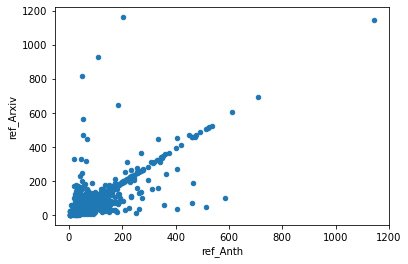

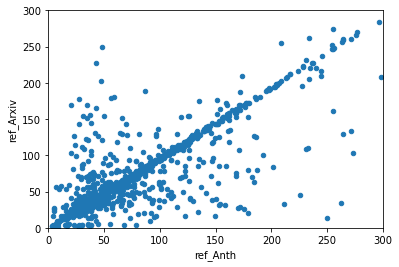

In [16]:
ref.plot('ref_Anth', 'ref_Arxiv', kind='scatter')
ref.plot('ref_Anth', 'ref_Arxiv', kind='scatter', xlim=[0,300], ylim=[0,300])


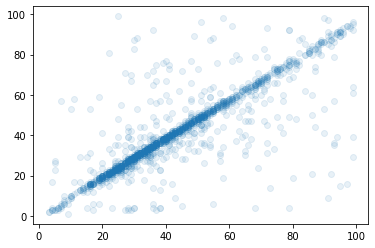

In [130]:
ref2 = ref[ref['ref_Anth']<100]
ref2 = ref2[ref2['ref_Arxiv']<100]
plt.pyplot.plot(ref2['ref_Anth'],ref2['ref_Arxiv'], 'o',alpha=0.1)

In [121]:
ref.head(2)

,ref_Anth,ref_Arxiv,cosine,dif
0,103,98,0.999025,5
1,10,9,0.999497,1


In [43]:
ref['dif'].describe()

count    1794.000000
mean        2.696767
std        55.873468
min      -956.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       484.000000
Name: dif, dtype: float64

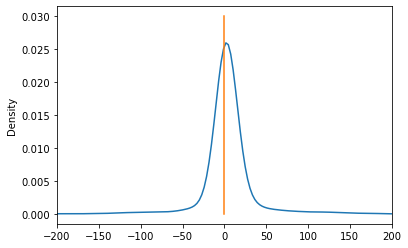

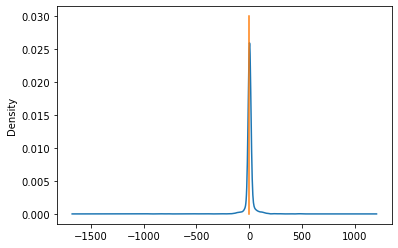

In [126]:
ref['dif'].plot(kind='density', xlim = [-200,200])
plt.pyplot.plot([0, 0], [0, 0.03])
plt.pyplot.show()

ref['dif'].plot(kind='density')
plt.pyplot.plot([0, 0], [0, 0.03])
plt.pyplot.show()

<AxesSubplot:xlabel='dif', ylabel='ref_Anth'>

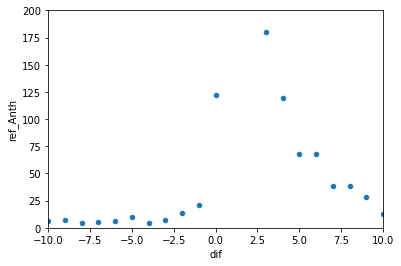

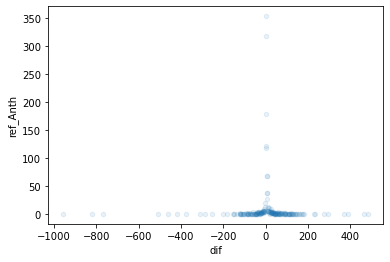

In [125]:
ref.groupby('dif').count().reset_index().plot(x='dif', y='ref_Anth', kind='scatter', alpha = 1, xlim=[-10,10], ylim=[0,200])
ref.groupby('dif').count().reset_index().plot(x='dif', y='ref_Anth', kind='scatter', alpha = 0.1,)


In [141]:
ref

,ref_Anth,ref_Arxiv,cosine,Jaccard,dif
0,103,98,0.999025,0.993084,5
1,10,9,0.999497,0.975108,1
2,52,52,0.910497,0.981017,0
4,43,41,0.999967,0.991091,2
5,65,40,0.997437,0.829216,25
...,...,...,...,...,...
1995,70,65,0.999369,0.989617,5
1996,76,44,0.934366,0.396257,32
1997,35,33,0.999646,0.992841,2
1998,13,17,0.996497,0.978793,-4


<AxesSubplot:xlabel='dif', ylabel='Jaccard'>

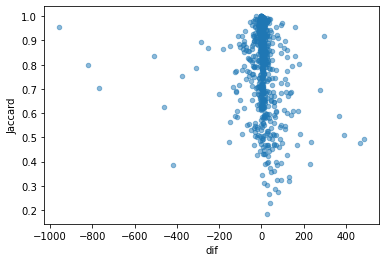

In [151]:
# plt.pyplot.plot('dif', 'Jaccard', 'o',data = ref)
ref.plot('dif', 'Jaccard', kind='scatter', alpha = 0.5)

<AxesSubplot:xlabel='dif', ylabel='cosine'>

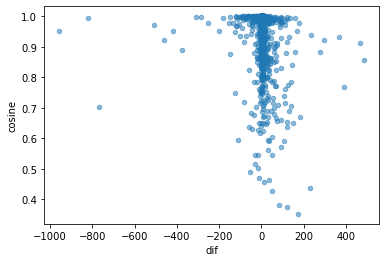

In [152]:
ref.plot('dif', 'cosine', kind='scatter', alpha = 0.5)
                                             

# End ref

# start scatter matrix

In [158]:
sample.columns

Index(['title', 'year', 'month', 'url', 'title_Arxiv', 'pdf_url_Arxiv',
       'published_Arxiv', 'result_Arxiv', 'Succes', 'w_Anth', 'w_Arxiv',
       'w_both', 'pages_Anth', 'pages_Arxiv', 'cosine', 'len_blocks',
       'len_Anth', 'len_Arxiv', 'len_both', 'ref_Anth', 'ref_Arxiv',
       'Jaccard'],
      dtype='object')

In [171]:
sample.describe()

,year,Succes,w_Anth,w_Arxiv,w_both,pages_Anth,pages_Arxiv,cosine,len_blocks,len_Anth,len_Arxiv,len_both,Jaccard
count,2000.000000,2000.000000,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000
mean,2019.339000,0.899500,6256.074486,6143.641467,4109.546415,10.495275,10.503057,0.958994,130.876042,141.816565,142.230128,141.814897,0.907562
std,1.580927,0.300741,2307.860855,2242.695046,2648.813332,3.940302,3.906565,0.087035,85.302463,77.730852,77.628586,77.733885,0.147273
min,2014.000000,0.000000,502.000000,1375.000000,0.000000,3.000000,3.000000,0.308500,1.000000,1.000000,1.000000,0.000000,0.005949
25%,2018.000000,1.000000,4444.000000,4432.000000,1794.000000,8.000000,8.000000,0.966810,68.500000,84.000000,84.000000,84.000000,0.896704
50%,2020.000000,1.000000,6273.000000,6148.000000,3990.000000,10.000000,10.000000,0.997527,127.000000,133.000000,134.000000,133.000000,0.982561
75%,2021.000000,1.000000,7406.000000,7282.000000,6180.000000,12.000000,12.000000,0.999667,190.000000,193.000000,193.000000,193.000000,0.990166
max,2021.000000,1.000000,29143.000000,28067.000000,25440.000000,55.000000,54.000000,1.000000,696.000000,696.000000,696.000000,696.000000,1.000000


In [182]:
x[['dif']] = sample['pages_Anth']-sample['pages_Arxiv']

<AxesSubplot:>

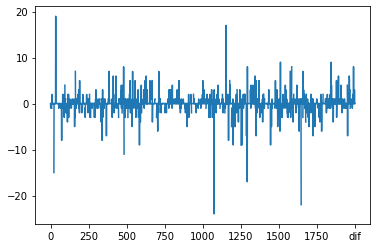

In [210]:
x.plot()

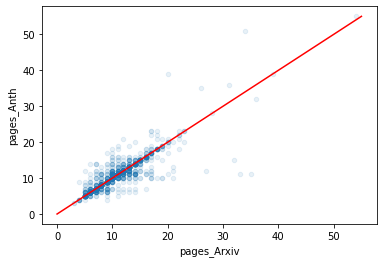

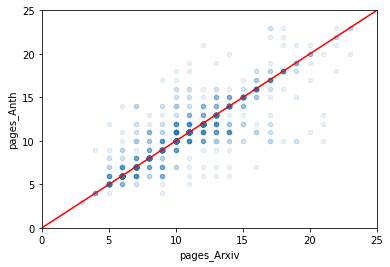

In [215]:
# plot pages Anth and pages Arxiv
sample.plot('pages_Arxiv', 'pages_Anth', kind='scatter',alpha=0.1)
plt.pyplot.plot([0, 55], [0, 55], c='r')
plt.pyplot.show()
sample.plot('pages_Arxiv', 'pages_Anth', kind='scatter',xlim=[0,25], ylim=[0,25],alpha=0.1)
plt.pyplot.plot([0, 55], [0, 55], c='r')
plt.pyplot.show()

In [216]:
sample.columns

Index(['title', 'year', 'month', 'url', 'title_Arxiv', 'pdf_url_Arxiv',
       'published_Arxiv', 'result_Arxiv', 'Succes', 'w_Anth', 'w_Arxiv',
       'w_both', 'pages_Anth', 'pages_Arxiv', 'cosine', 'len_blocks',
       'len_Anth', 'len_Arxiv', 'len_both', 'ref_Anth', 'ref_Arxiv',
       'Jaccard'],
      dtype='object')

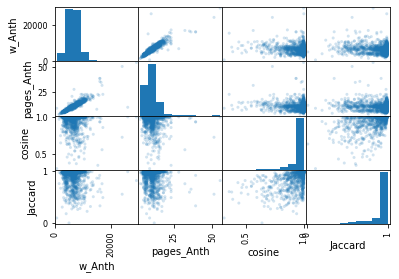

In [220]:
# ['title', 'year', 'month', 'url', 'title_Arxiv', 'pdf_url_Arxiv',
#        'published_Arxiv', 'result_Arxiv', 'Succes', 'w_Anth', 'w_Arxiv',
#        'w_both', 'pages_Anth', 'pages_Arxiv', 'cosine', 'len_blocks',
#        'len_Anth', 'len_Arxiv', 'len_both', 'ref_Anth', 'ref_Arxiv',
#        'Jaccard'],

#'w_Anth'
#'pages_Anth'
#'cosine'
#'ref_Anth'
#'Jaccard'

pd.plotting.scatter_matrix(sample[['w_Anth','pages_Anth','cosine','Jaccard']], alpha=0.2);

# start 

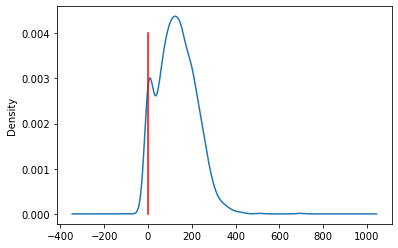

In [226]:
# sample['len_blocks'].unique(), len(sample['len_blocks'].unique())
sample['len_blocks'].plot(kind = 'density')
plt.pyplot.plot([0, 0], [0, 0.004], c='r')
plt.pyplot.show()

In [227]:
sample['len_blocks'].describe()

count    1799.000000
mean      130.876042
std        85.302463
min         1.000000
25%        68.500000
50%       127.000000
75%       190.000000
max       696.000000
Name: len_blocks, dtype: float64

In [233]:
sample.cosine.isna().sum()

201

<AxesSubplot:title={'center':'Density plot cosin score of papers'}, ylabel='Density'>

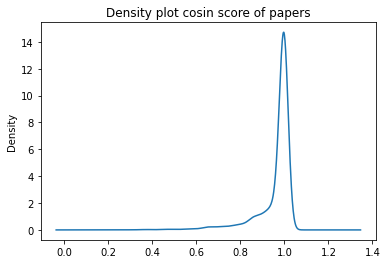

In [242]:
sample['cosine'].plot(kind= 'density', title= 'Density plot cosin score of papers')

In [243]:
sample[['year', 'month', 'published_Arxiv']]

,year,month,published_Arxiv
0,2021,November,2021-09-10 12:13:45+00:00
1,2015,July,2017-08-19 14:43:50+00:00
2,2020,July,2020-05-04 17:01:11+00:00
3,2018,July,2018-01-22 18:58:18+00:00
4,2019,July,2019-11-20 11:14:07+00:00
...,...,...,...
1995,2021,August,2021-06-07 09:56:18+00:00
1996,2020,November,2020-04-30 16:18:18+00:00
1997,2020,November,2020-10-03 03:18:52+00:00
1998,2021,August,2021-06-30 20:04:55+00:00


pd.to_datetime('2021-09-10 12:13:45+00:00'), pd.to_datetime('2021 july'), pd.to_datetime('2019 7'), pd.to_datetime('1999 December'), pd.to_datetime('1800 June')


sample['month'].unique()

not_sample['month'].unique()

'6--9 September'.split('-')[-1], '29 October--3 November'.split('-')[-1]

'December 8-9'.split('-')[0], 'May 11{--}13'.split('{')[0], '1{--}3 December'.split('}')[-1]


sample.month

sample.month.describe(), sample.month.unique()

In [244]:
arg = {
'November': 'November', 
'July': 'July',
'August':'August', 
'September': 'September',
'May': 'May',
'June':'June', 
'October':'October',
'April':'April', 
'December':'December',
'12':'12',
'February':'February',
'March':'March',
'19 August':'19 August',
'January':'January',
'7':'7',
'16 October':'16 October',
    
'October{--}November': 'November',
'September{--}October':'October', 
'1{--}3 December': '3 December', 
'May 11{--}13': 'May 11',
'May{--}June': 'June',

'May 31--2 June': '2 June',        
'6--9 September': '9 September', 
'12--13 November': '13 November',    

'4--6 December': '6 December',
'11--12 September': '12 September', 
'29 October--3 November':'3 November',
'October-November': 'November', 
'November 2-3': '3 November', 
'October 29-30': 'October 30',
'September 5-8':'September 5-8', 
'December 8-9': 'December 9', 
'October 28 - November 1': 'November 1',
'December 3-4':'December 4', 
'15-16 September': '16 September',
np.nan : 'NY'
}
sample['month'].map(arg,na_action='ignore').describe()

count         2000
unique          23
top       November
freq           679
Name: month, dtype: object

In [255]:
time = sample.copy()
time['month'].map(arg,na_action='ignore')
time['dt_Anth'] = pd.to_datetime(time['year'].astype(str)+ ' '+time['month'].map(arg,na_action='ignore'))
time['dt_Arxiv'] = pd.to_datetime(time['published_Arxiv'].apply(lambda s: s[:-15]),utc=False )

sample['Anth_datetime'] = pd.to_datetime(sample['year'].astype(str)+ ' '+sample['month'].map(arg,na_action='ignore'))
sample['published_Arxiv'] = pd.to_datetime(sample['published_Arxiv'],utc=False )

In [256]:
time['dif'] = time['dt_Anth']-time['dt_Arxiv']

In [266]:
time[['year', 'month','dt_Anth', 'dt_Arxiv', 'published_Arxiv', 'dif']].head(30)

,year,month,dt_Anth,dt_Arxiv,published_Arxiv,dif
0,2021,November,2021-11-01,2021-09-10,2021-09-10 12:13:45+00:00,52 days
1,2015,July,2015-07-01,2017-08-19,2017-08-19 14:43:50+00:00,-780 days
2,2020,July,2020-07-01,2020-05-04,2020-05-04 17:01:11+00:00,58 days
3,2018,July,2018-07-01,2018-01-22,2018-01-22 18:58:18+00:00,160 days
4,2019,July,2019-07-01,2019-11-20,2019-11-20 11:14:07+00:00,-142 days
5,2016,August,2016-08-01,2016-03-19,2016-03-19 10:09:53+00:00,135 days
6,2017,September,2017-09-01,2017-04-15,2017-04-15 03:42:51+00:00,139 days
7,2018,October-November,2018-11-01,2018-09-05,2018-09-05 01:08:23+00:00,57 days
8,2018,May,2018-05-01,2017-05-17,2017-05-17 17:45:15+00:00,349 days
9,2018,July,2018-07-01,2017-11-15,2017-11-15 02:12:34+00:00,228 days


In [269]:
time['dif'][0]

Timedelta('52 days 00:00:00')

In [272]:
time['day'] = time['dif'].days

AttributeError: 'Series' object has no attribute 'days'

<AxesSubplot:>

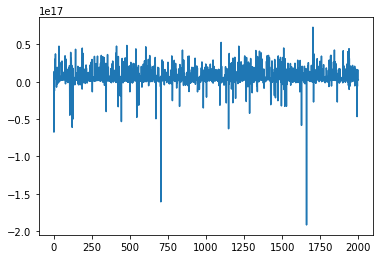

In [267]:
time['dif'].plot()

In [ ]:
sample[['Anth_datetime', 'year', 'month', 'published_Arxiv']].head(20)

In [ ]:
df = sample[['Anth_datetime', 'year', 'month', 'published_Arxiv']].copy()

In [ ]:
df['Anth_datetime']

In [ ]:
df['diff'] = df['Anth_datetime']-df['published_Arxiv'].replace(tzinfo=None)

In [ ]:
sample['published_Arxiv'][1]

In [ ]:
'2017-04-15 03:42:51+00:00'[:-15]

In [ ]:
pd.to_datetime('2017-04-15 03:42:51+00:00') - pd.to_datetime('2017-04-15 03:42:51+00:00')

# figures